# Simple correlation example

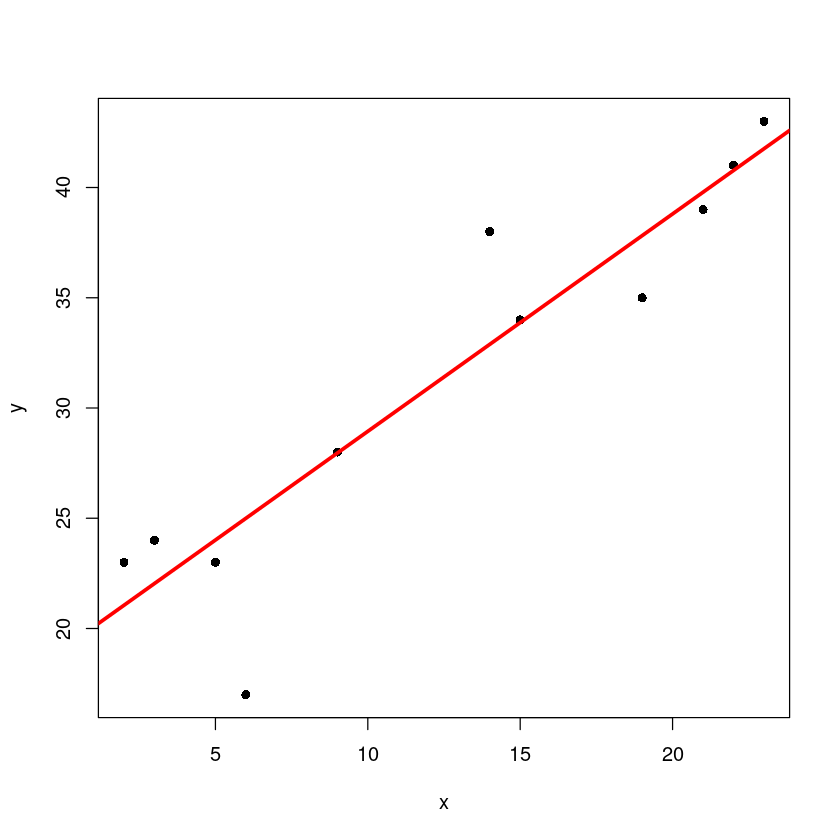

In [2]:
x <- c(2, 3, 3, 5, 6, 9, 14, 15, 19, 21, 22, 23)
y <- c(23, 24, 24, 23, 17, 28, 38, 34, 35, 39, 41, 43)

#create scatterplot 
plot(x, y, pch=16)
# Regression line
abline(lm(y ~ x), col = "red", lwd = 3)

In [ ]:
cor.test(x, y)

# Load and check data

In [9]:
library(MASS)
head(survey)
?survey

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


survey {MASS},R Documentation


In [2]:
summary(survey)

     Sex          Wr.Hnd          NW.Hnd        W.Hnd          Fold    
 Female:118   Min.   :13.00   Min.   :12.50   Left : 18   L on R : 99  
 Male  :118   1st Qu.:17.50   1st Qu.:17.50   Right:218   Neither: 18  
 NA's  :  1   Median :18.50   Median :18.50   NA's :  1   R on L :120  
              Mean   :18.67   Mean   :18.58                            
              3rd Qu.:19.80   3rd Qu.:19.73                            
              Max.   :23.20   Max.   :23.50                            
              NA's   :1       NA's   :1                                
     Pulse             Clap       Exer       Smoke         Height     
 Min.   : 35.00   Left   : 39   Freq:115   Heavy: 11   Min.   :150.0  
 1st Qu.: 66.00   Neither: 50   None: 24   Never:189   1st Qu.:165.0  
 Median : 72.50   Right  :147   Some: 98   Occas: 19   Median :171.0  
 Mean   : 74.15   NA's   :  1              Regul: 17   Mean   :172.4  
 3rd Qu.: 80.00                            NA's :  1   3rd Qu.:180.0 

# Simple mean calculation:

In [ ]:
mean(survey$Height, na.rm=TRUE)  # skip missing values

## Anonther library which does descriptive statistics: Hmisc

In [ ]:
library(Hmisc)
describe(survey$Height)

## We can visuall see correlation by plotting the data

In [ ]:
# Creating the plot
plot(survey$Age, survey$Height, pch = 19, col = "lightblue")

# Regression line
abline(lm(survey$Height ~ survey$Age, col = "red", lwd = 3))

# There are mainly two types of correlation: 
## Parametric Correlation -- Pearson correlation
It measures a linear dependence between two variables (x and y) is known as a parametric correlation test because it depends on the distribution of the data.

## Non-Parametric Correlation – Kendall(tau) and Spearman(rho)
They are rank-based correlation coefficients, are known as non-parametric correlation.

In [ ]:
survey = survey[complete.cases(survey), ]
head(survey)

In [ ]:
coeff = cor(age$height, age$NW.hand, method = "pearson")
cat("Pearson correlation coefficient is:", coeff)

In [ ]:
result = cor.test(survey$Pulse, survey$Age, method = "pearson")
 
print(result)

## Kendall Rank Coeff

### Prepare the data

In [10]:
smoke = as.numeric(factor(survey$Smoke, levels=c("Never","Occas","Regul","Heavy")))
exercise = as.numeric(factor(survey$Exer, levels=c("None","Some","Freq")))
head(smoke)
head(exercise)

[1] 1 3 2 1 1 1

[1] 2 1 1 1 2 2

Compute the Kendall coefficient

In [11]:
model = cbind(exercise, smoke)
coeff = cor(model, method="kendall", use="pairwise")
coeff

,exercise,smoke
exercise,1.00000000,0.08354651
smoke,0.08354651,1.00000000


Compute the p-value

In [ ]:
result = cor.test(exercise, smoke, method = "kendall", use="pairwise")
 
print(result)

In [2]:
heights = read.csv("heights.csv")
head(heights)

,Name,Height,forearm,headcirc,forarmestimate,headEstimate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Zihan Li,176,25.00,58,162.5000,183.86
2,Wenhui Xie,167,22.00,55,152.0600,174.35
3,Feng Chen,182,26.00,61,165.9800,193.37
4,Luna Li,174,27.00,58,169.4600,183.86
5,Zoljargal Lkhagvajav (Zoey),172,27.00,56,169.4600,177.52
6,Ray Chung,178,27.94,61,172.7312,193.37


In [7]:
coeff = cor(heights$forarmestimate, heights$Height, method = "pearson")
cat("Pearson correlation coefficient is:", coeff)

Pearson correlation coefficient is: 0.6562095

In [3]:
realHeight = heights[,c('Height')]
head(realHeight)

[1] 176 167 182 174 172 178

In [4]:
realHeight = data.frame(sort(heights[,c('Height')]))
head(realHeight)

,sort.heights...c..Height....
,<dbl>
1,157.00
2,162.56
3,167.00
4,167.00
5,168.00
6,171.00


In [6]:
forearmestimate = data.frame(sort(heights[,c('forarmestimate')]))
head(forearmestimate)

,sort.heights...c..forarmestimate....
,<dbl>
1,152.0600
2,155.0528
3,162.5000
4,162.5000
5,162.5000
6,163.8920


In [7]:
model = cbind(realHeight, forearmestimate)
coeff = cor(model, method="kendall", use="pairwise")
coeff

,sort.heights...c..Height....,sort.heights...c..forarmestimate....
sort.heights...c..Height....,1.00000,0.96576
sort.heights...c..forarmestimate....,0.96576,1.00000


In [5]:
headestimate = data.frame(sort(heights[,c('headEstimate')]))
model = cbind(realHeight, headestimate)
coeff = cor(model, method="kendall", use="pairwise")
coeff

,sort.heights...c..Height....,sort.heights...c..headEstimate....
sort.heights...c..Height....,1.0000000,0.9607689
sort.heights...c..headEstimate....,0.9607689,1.0000000
